# Task 1

### 1) Estimate the coefficients {a0, a1} of an AR(1) process from this series using linear regression. Why do you obtain this specific value for a1 and how does it relate to the properties of the time series?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat                #import mat data
from sklearn.linear_model import LinearRegression

mat_file = loadmat('Tut2_file1.mat')
data = mat_file['x'].ravel()

In [2]:
# Coefficients estimation
xT = np.delete(data, 0)
Xp = np.zeros((len(data)-1,2))
Xp[:,0] = 1
Xp[:,1] = np.delete(data, len(data)-1)

temp = np.matmul(np.transpose(Xp),Xp)
temp = np.linalg.inv(temp)
a = np.matmul(np.transpose(Xp),xT)
a = np.matmul(temp,a)

print('Coefficient a0: ',a[0])
print('Coefficient a1: ',a[1])

Coefficient a0:  0.07908230174042785
Coefficient a1:  0.9970275421282717


In [4]:
def coeff_AR(data, p):
    xT = data[p:]
    
    Xp = np.zeros((len(data)-p,p+1))
    Xp[:,0] = 1
    
    for i in range(1,p+1):
        Xp[:,i] = data[p-i:-i]
    
    temp = np.matmul(np.transpose(Xp),Xp)
    temp = np.linalg.inv(temp)
    a = np.matmul(np.transpose(Xp),xT)
    a = np.matmul(temp,a)
    
    return a
a = coeff_AR(data,1)
print(a)

[0.0790823  0.99702754]


In [3]:
# Smooth out fluctuations by averaging N values
N = 500
mean_data = data.reshape(int(len(data)/N), -1)
mean_data = np.mean(mean_data, axis=1)
t = np.arange(0,len(mean_data))*N

In [4]:
# Coefficients estimation of average data
xT = np.delete(mean_data, 0)
Xp = np.zeros((len(mean_data)-1,2))
Xp[:,0] = 1
Xp[:,1] = np.delete(mean_data, len(mean_data)-1)

temp = np.matmul(np.transpose(Xp),Xp)
temp = np.linalg.inv(temp)
a = np.matmul(np.transpose(Xp),xT)
a = np.matmul(temp,a)

print('Coefficient a0: ',a[0])
print('Coefficient a1: ',a[1])

Coefficient a0:  0.5013796982878205
Coefficient a1:  1.00000561662287


In [5]:
# Infere series
inferred = np.zeros(len(mean_data))
inferred[0] = mean_data[0]

for i in range(1,len(mean_data)):
    inferred[i] = a[0] + a[1] * inferred[i-1]

Text(0.5, 1.0, 'AR process')

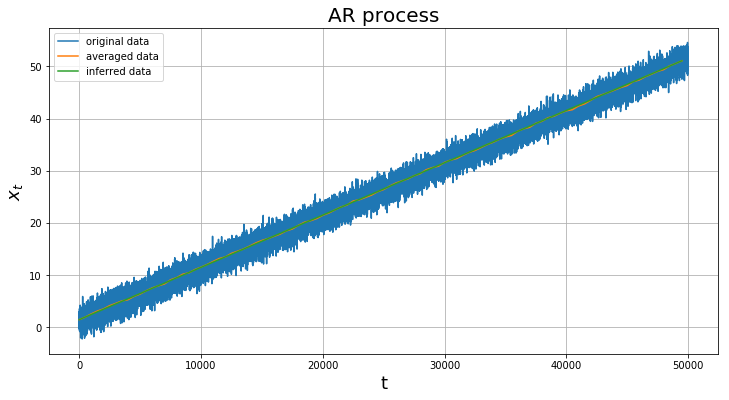

In [6]:
# Plot data
plt.figure(figsize=[12,6])
plt.plot(np.arange(0,len(data)), data, label='original data')
plt.plot(t, mean_data, label='averaged data')
plt.plot(t, inferred, label='inferred data')
plt.xlabel('t', fontsize = 18)
plt.ylabel(r'$x_t$', fontsize = 18)
plt.grid()
plt.legend()
plt.title('AR process', fontsize = 20)

It can be noticed that the estimated coefficient $a_1$ is close to 1 (bigger than 1 for the avereged data): this means that the time series is growing in time, as it can be easily seen by looking at the data, which have increasing vaues over time.

### 2) Detrend the time series by performing linear regression on time and repeat the analysis above. How does the coefficient (and the AR process) change?

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


Text(0.5, 1.0, 'Detrend AR process')

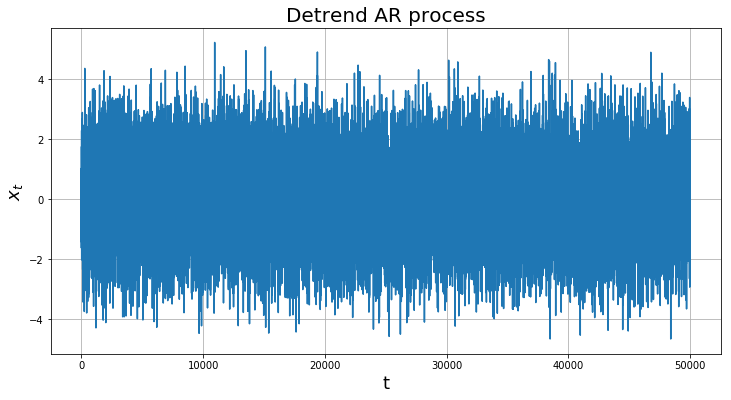

In [7]:
# Linear fit
model = LinearRegression().fit(np.arange(0,len(data)).reshape(-1, 1), data)
trend = model.predict(np.arange(0,len(data)).reshape(-1, 1))
detrend_data = data - trend

# Plot data
plt.figure(figsize=[12,6])
plt.plot(np.arange(0,len(data)), detrend_data, label='original data')
plt.xlabel('t', fontsize = 18)
plt.ylabel(r'$x_t$', fontsize = 18)
plt.grid()
plt.title('Detrend AR process', fontsize = 20)

In [8]:
# Coefficients estimation
xT = np.delete(detrend_data, 0)
Xp = np.zeros((len(detrend_data)-1,2))
Xp[:,0] = 1
Xp[:,1] = np.delete(detrend_data, len(detrend_data)-1)

temp = np.matmul(np.transpose(Xp),Xp)
temp = np.linalg.inv(temp)
a = np.matmul(np.transpose(Xp),xT)
a = np.matmul(temp,a)

print('Coefficient a0: ',a[0])
print('Coefficient a1: ',a[1])

Coefficient a0:  5.168511285257574e-05
Coefficient a1:  0.6028958137142936


In [9]:
# Linear fit
model = LinearRegression().fit(t.reshape(-1, 1), mean_data)
trend = model.predict(t.reshape(-1, 1))
detrend_mean_data = mean_data - trend

In [10]:
# Coefficients estimation of average data
xT = np.delete(detrend_mean_data, 0)
Xp = np.zeros((len(detrend_mean_data)-1,2))
Xp[:,0] = 1
Xp[:,1] = np.delete(detrend_mean_data, len(detrend_mean_data)-1)

temp = np.matmul(np.transpose(Xp),Xp)
temp = np.linalg.inv(temp)
mean_a = np.matmul(np.transpose(Xp),xT)
mean_a = np.matmul(temp,mean_a)

print('Coefficient a0: ',mean_a[0])
print('Coefficient a1: ',mean_a[1])

Coefficient a0:  0.0006378178962749469
Coefficient a1:  0.10962784556696148


Text(0.5, 1.0, 'AR process')

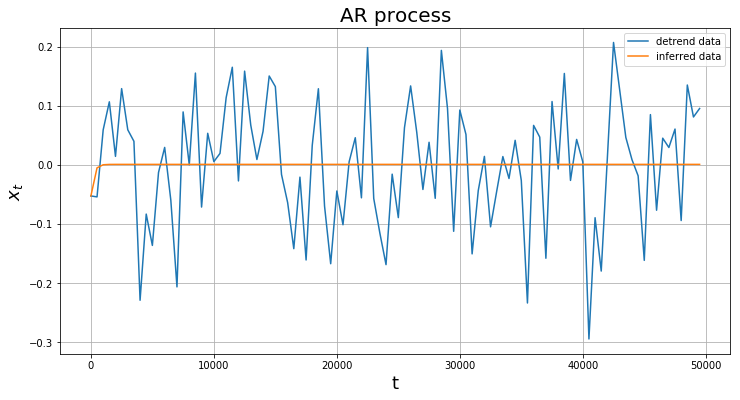

In [11]:
# Infere series
inferred = np.zeros(len(detrend_mean_data))
inferred[0] = detrend_mean_data[0]

for i in range(1,len(mean_data)):
    inferred[i] = mean_a[0] + mean_a[1] * inferred[i-1]
    
# Plot data
plt.figure(figsize=[12,6])
plt.plot(t, detrend_mean_data, label='detrend data')
plt.plot(t, inferred, label='inferred data')
plt.xlabel('t', fontsize = 18)
plt.ylabel(r'$x_t$', fontsize = 18)
plt.grid()
plt.legend()
plt.title('AR process', fontsize = 20)

By detrending the averaged time series, the divergent trend over time is cancelled out: this can also be noticed by the new value of the coefficient $a_1$, which has become smaller than 1: this means that the series is now stationary. In addition, the offset coefficient $a_0$ is almost null.

### 3) Generate predictions from your estimated AR(1) model up to five time steps ahead. How well do they agree with the true signal (averaged across the whole series)? What is the expected error variation for one-step ahead as compared to five step ahead predictions?

In [12]:
# one-step ahead prediction
one_step_pred = np.zeros(len(detrend_data)-1)

for i in range(0,len(one_step_pred)):
    one_step_pred[i] = a[0] + a[1]*detrend_data[i]
    
err_one_step = np.abs(one_step_pred - np.delete(detrend_data,0))
mean_one_step = np.mean(err_one_step)
sigma_one_step = np.std(err_one_step)

print('Mean error one-step ahead prediction:', mean_one_step,'+-', sigma_one_step)
    
# five-step ahead prediction
five_step_pred = np.zeros(len(detrend_data)-5)

for i in range(0,len(five_step_pred)):
    temp = detrend_data[i]
    for j in range(0,4):
        temp = a[0] + a[1]*temp
    five_step_pred[i] = a[0] + a[1]*temp

err_five_step = np.abs(five_step_pred - detrend_data[5:])
mean_five_step = np.mean(err_five_step)
sigma_five_step = np.std(err_five_step)
print('Mean error five-step ahead prediction:', mean_five_step,'+-', sigma_five_step)

Mean error one-step ahead prediction: 0.7979939400044307 +- 0.6032053251973615
Mean error five-step ahead prediction: 0.99713494530677 +- 0.754304343513829


As it could be expected, the mean error for the five-step ahead prediction is bigger that the one-step prediction error, so the error grows as the order of the prediction increases, since the error is propagated trough every predictive step.

### 4) Consider the univariate time series contained in file ’Tut2 file2.mat’ (Tut2 file2.txt’). Estimate the coefficients {a0, a1} of an AR(1) process from this series as above, using linear regression. Is a linear time series model suitable for this type of signal? Plot the signal in various ways (refer back to last tutorial), and examine the autocorrelations in the residuals.

Text(0.5, 1.0, 'AR process')

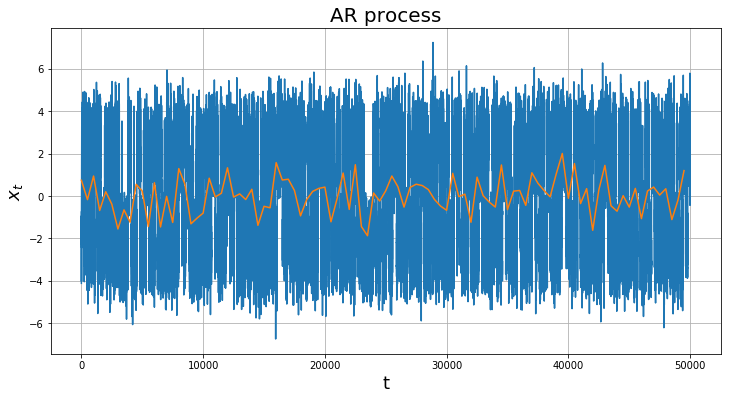

In [13]:
mat_file = loadmat('Tut2_file2.mat')
data = mat_file['x'].ravel()

# Smooth out fluctuations by averaging N values
N = 500
mean_data = data.reshape(int(len(data)/N), -1)
mean_data = np.mean(mean_data, axis=1)
t = np.arange(0,len(mean_data))*N

# Plot data
plt.figure(figsize=[12,6])
plt.plot(np.arange(0,len(data)), data)
plt.plot(t, mean_data)
plt.xlabel('t', fontsize = 18)
plt.ylabel(r'$x_t$', fontsize = 18)
plt.grid()
plt.title('AR process', fontsize = 20)

In [14]:
# Coefficients estimation
xT = np.delete(data, 0)
Xp = np.zeros((len(data)-1,2))
Xp[:,0] = 1
Xp[:,1] = np.delete(data, len(data)-1)

temp = np.matmul(np.transpose(Xp),Xp)
temp = np.linalg.inv(temp)
a = np.matmul(np.transpose(Xp),xT)
a = np.matmul(temp,a)

print('Coefficient a0: ',a[0])
print('Coefficient a1: ',a[1])

Coefficient a0:  0.0014164137603714932
Coefficient a1:  0.8731316613800499


Text(0.5, 1.0, 'First return map')

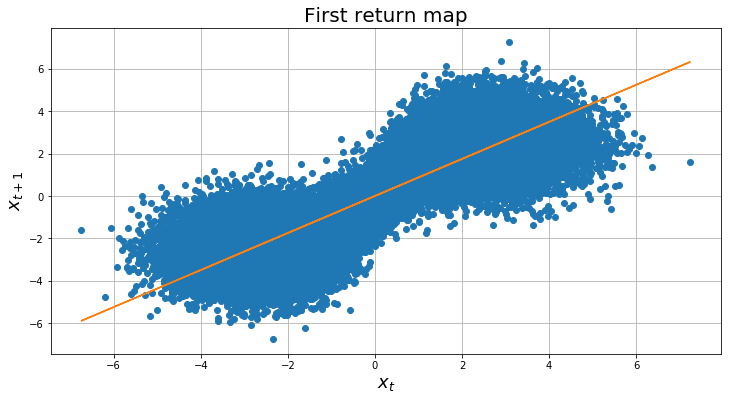

In [15]:
# Return plot
plt.figure(figsize=[12,6])
plt.plot(data[0:-1], data[1:], 'o')
plt.plot(data[0:-1], a[0] + a[1]*data[0:-1])
plt.xlabel('$x_t$', fontsize = 18)
plt.ylabel('$x_{t+1}$', fontsize = 18)
plt.grid()
plt.title('First return map', fontsize = 20)

In [16]:
# Coefficients estimation of average data
xT = np.delete(mean_data, 0)
Xp = np.zeros((len(mean_data)-1,2))
Xp[:,0] = 1
Xp[:,1] = np.delete(mean_data, len(mean_data)-1)

temp = np.matmul(np.transpose(Xp),Xp)
temp = np.linalg.inv(temp)
mean_a = np.matmul(np.transpose(Xp),xT)
mean_a = np.matmul(temp,mean_a)

print('Coefficient a0: ',mean_a[0])
print('Coefficient a1: ',mean_a[1])

Coefficient a0:  0.002639901369238877
Coefficient a1:  -0.07268394202486453


In [17]:
# one-step ahead prediction
one_step_pred = np.zeros(len(data)-1)

for i in range(0,len(one_step_pred)):
    one_step_pred[i] = a[0] + a[1]*data[i]
    
err_one_step = np.abs(one_step_pred - np.delete(data,0))
mean_one_step = np.mean(err_one_step)
sigma_one_step = np.std(err_one_step)

print('Mean error one-step ahead prediction:', mean_one_step,'+-', sigma_one_step)

Mean error one-step ahead prediction: 0.9833616864365339 +- 0.7368666593872457


In [18]:
def acov(x, dt):
    T = len(x)
    x_mean = np.mean(x)
    x = x - x_mean
    
    cov = 0
    
    # maybe try convolution function
    for i in range(T-dt):
        cov += x[i]*x[i+dt]

    return cov / (T-dt-1)
        

def acorr(x, dt):
    return acov(x,dt) / acov(x,0)

Text(0.5, 1.0, 'Autocorrelation functions of first 500 values')

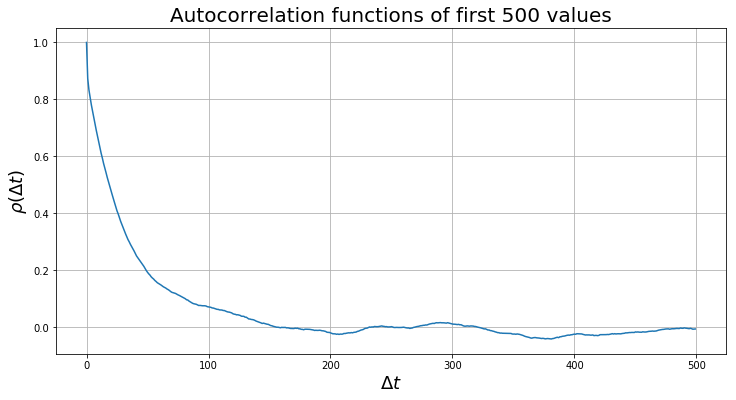

In [19]:
# Compute autocorrelation function
n = 500
corr_inv = np.zeros(n)

for i in range(n):
    corr_inv[i] = acorr(data, i)

# Plot
plt.figure(figsize=[12,6])
plt.plot(np.arange(0,n),corr_inv)
plt.xlabel('$\Delta t$', fontsize = 18)
plt.ylabel(r'$\rho (\Delta t)$', fontsize = 18)
plt.grid()
plt.title('Autocorrelation functions of first %i values' %n, fontsize = 20)

As it can be noticed by the first return map, the data don't seem to distribute randomly along the estimated model, but they seem to be bimodal: for this reason an higher order non-linear estimation model could be more appropriate. Also, by looking at the autocorrelation function, it goes to zero monotonically (so there are no releant peaks): this means that the time series is non-periodic.

Coefficient a0:  0.00014285169139278104
Coefficient a1:  -0.34105924877256366
Mean error one-step ahead prediction: 0.951718215092716 +- 0.7203172522332753


Text(0.5, 1.0, 'Autocorrelation functions of first 50 values')

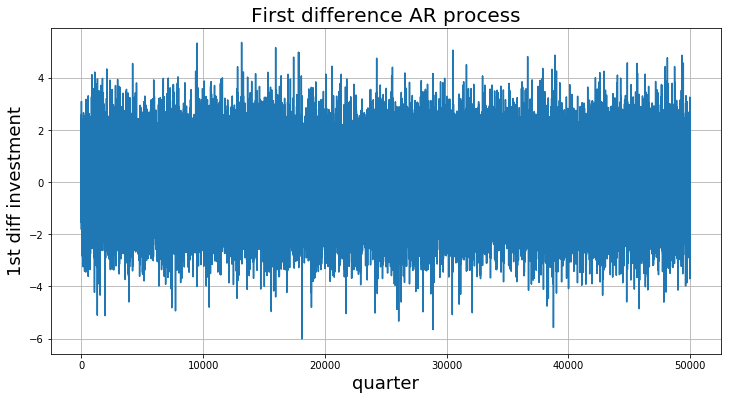

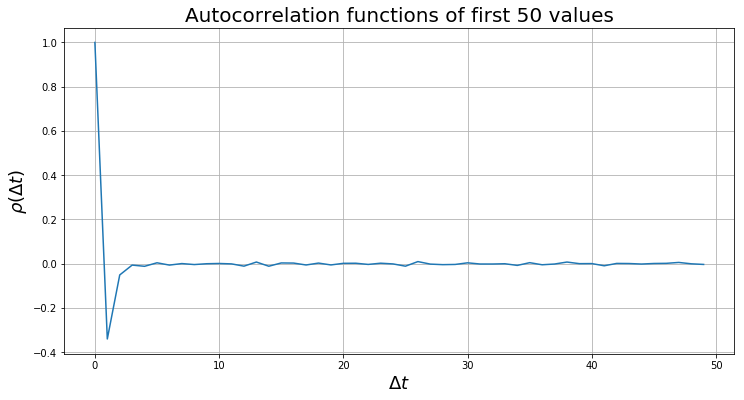

In [20]:
# First differences series
first_diff_inv = np.diff(data)

# Plot
plt.figure(figsize=[12,6])
plt.plot(np.arange(0,len(first_diff_inv)),first_diff_inv)
plt.xlabel('quarter', fontsize = 18)
plt.ylabel('1st diff investment', fontsize = 18)
plt.grid()
plt.title('First difference AR process', fontsize = 20)

# Coefficients estimation
xT = np.delete(first_diff_inv, 0)
Xp = np.zeros((len(first_diff_inv)-1,2))
Xp[:,0] = 1
Xp[:,1] = np.delete(first_diff_inv, len(first_diff_inv)-1)

temp = np.matmul(np.transpose(Xp),Xp)
temp = np.linalg.inv(temp)
first_a = np.matmul(np.transpose(Xp),xT)
first_a = np.matmul(temp,first_a)

print('Coefficient a0: ',first_a[0])
print('Coefficient a1: ',first_a[1])

# one-step ahead prediction
one_step_pred = np.zeros(len(first_diff_inv)-1)

for i in range(0,len(one_step_pred)):
    one_step_pred[i] = first_a[0] + first_a[1]*first_diff_inv[i]
    
err_one_step = np.abs(one_step_pred - np.delete(first_diff_inv,0))
mean_one_step = np.mean(err_one_step)
sigma_one_step = np.std(err_one_step)

print('Mean error one-step ahead prediction:', mean_one_step,'+-', sigma_one_step)

# Compute autocorrelation function
n = 50
corr_inv = np.zeros(n)

for i in range(n):
    corr_inv[i] = acorr(first_diff_inv, i)

# Plot
plt.figure(figsize=[12,6])
plt.plot(np.arange(0,n),corr_inv)
plt.xlabel('$\Delta t$', fontsize = 18)
plt.ylabel(r'$\rho (\Delta t)$', fontsize = 18)
plt.grid()
plt.title('Autocorrelation functions of first %i values' %n, fontsize = 20)

Coefficient a0:  -4.239491988367865e-05
Coefficient a1:  -0.6079428461636033
Mean error one-step ahead prediction: 1.3174514610426407 +- 0.9950282356381944


Text(0.5, 1.0, 'Autocorrelation functions of first 50 values')

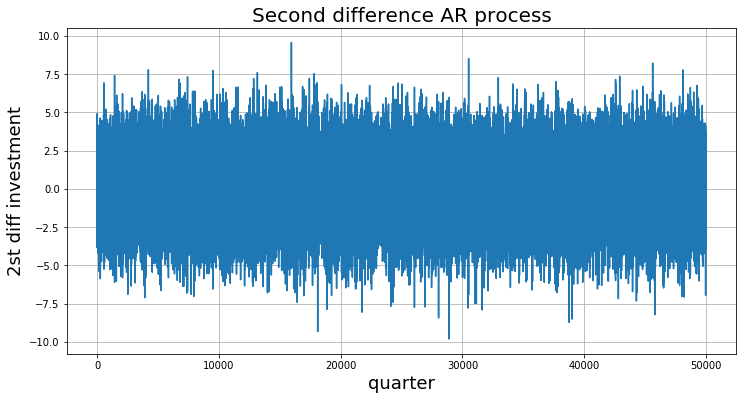

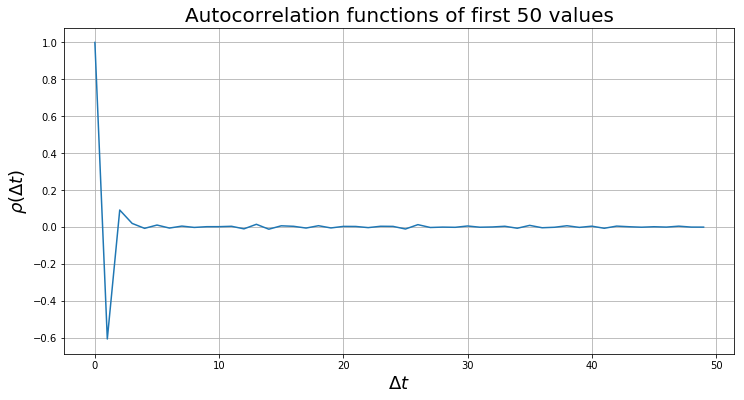

In [21]:
# Second differences series
second_diff_inv = np.diff(first_diff_inv)

# Plot
plt.figure(figsize=[12,6])
plt.plot(np.arange(0,len(second_diff_inv)),second_diff_inv)
plt.xlabel('quarter', fontsize = 18)
plt.ylabel('2st diff investment', fontsize = 18)
plt.grid()
plt.title('Second difference AR process', fontsize = 20)

# Coefficients estimation
xT = np.delete(second_diff_inv, 0)
Xp = np.zeros((len(second_diff_inv)-1,2))
Xp[:,0] = 1
Xp[:,1] = np.delete(second_diff_inv, len(second_diff_inv)-1)

temp = np.matmul(np.transpose(Xp),Xp)
temp = np.linalg.inv(temp)
second_a = np.matmul(np.transpose(Xp),xT)
second_a = np.matmul(temp,second_a)

print('Coefficient a0: ',second_a[0])
print('Coefficient a1: ',second_a[1])

# one-step ahead prediction
one_step_pred = np.zeros(len(second_diff_inv)-1)

for i in range(0,len(one_step_pred)):
    one_step_pred[i] = second_a[0] + second_a[1]*second_diff_inv[i]
    
err_one_step = np.abs(one_step_pred - np.delete(second_diff_inv,0))
mean_one_step = np.mean(err_one_step)
sigma_one_step = np.std(err_one_step)

print('Mean error one-step ahead prediction:', mean_one_step,'+-', sigma_one_step)

# Compute autocorrelation function
n = 50
corr_inv = np.zeros(n)

for i in range(n):
    corr_inv[i] = acorr(second_diff_inv, i)

# Plot
plt.figure(figsize=[12,6])
plt.plot(np.arange(0,n),corr_inv)
plt.xlabel('$\Delta t$', fontsize = 18)
plt.ylabel(r'$\rho (\Delta t)$', fontsize = 18)
plt.grid()
plt.title('Autocorrelation functions of first %i values' %n, fontsize = 20)

# Task 2

### Determine the order of both processes by plotting the autocorrelation and the partial autocorrelation function of x AR and x MA.

Text(0.5, 1.0, 'MA process')

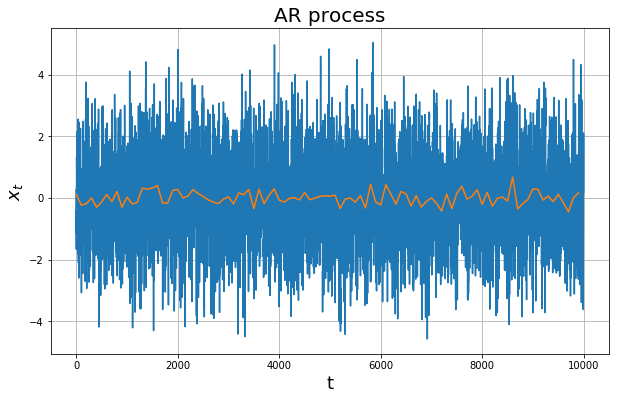

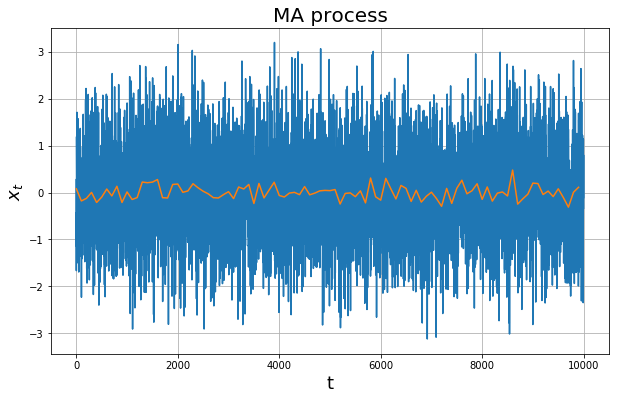

In [22]:
mat_file = loadmat('Tut2_file3.mat')
xAR = mat_file['x_AR'].ravel()
xMA = mat_file['x_MA'].ravel()

# Smooth out fluctuations by averaging N values
N = 100

mean_xAR = xAR.reshape(int(len(xAR)/N), -1)
mean_xAR = np.mean(mean_xAR, axis=1)
t = np.arange(0,len(mean_xAR))*N

mean_xMA = xMA.reshape(int(len(xMA)/N), -1)
mean_xMA = np.mean(mean_xMA, axis=1)

# Plot data
plt.figure(figsize=[10,6])
plt.plot(np.arange(0,len(xAR)), xAR)
plt.plot(t,mean_xAR)
plt.xlabel('t', fontsize = 18)
plt.ylabel(r'$x_t$', fontsize = 18)
plt.grid()
plt.title('AR process', fontsize = 20)

plt.figure(figsize=[10,6])
plt.plot(np.arange(0,len(xMA)), xMA)
plt.plot(t,mean_xMA)
plt.xlabel('t', fontsize = 18)
plt.ylabel(r'$x_t$', fontsize = 18)
plt.grid()
plt.title('MA process', fontsize = 20)

In [23]:
# Define partial autocorrelation function
def pacorr (x,n):
    pacorr = np.zeros(n)
    
    T = len(x)
    
    # setting first two values
    pacorr[0] = 1.0
    pacorr[1] = acorr(x,n)
    
    for k in range(2,n):
        t = np.zeros((T-k,k-1))
            
        for i in range(t.shape[0]):
            t[i,:] = x[i+1:i+k]
                
        reg1 = LinearRegression().fit(t, x[k:])
        reg2 = LinearRegression().fit(t, x[:-k])
        z1 = x[k:] - reg1.predict(t)
        z2 = x[:-k] - reg2.predict(t)
        
        mean1 = np.mean(z1)
        std1 = np.std(z1)
        mean2 = np.mean(z2)
        std2 = np.std(z2)
        
        pacorr[k] = np.mean((z1-mean1)*(z2-mean2))/(std1*std2)

    return pacorr

Text(0.5, 1.0, 'Partial-autocorrelation functions of first 20 values')

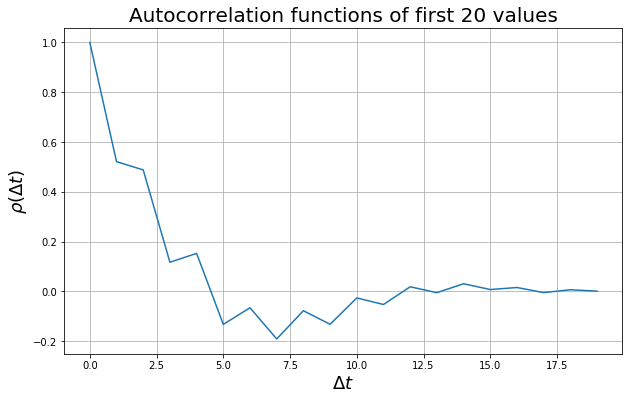

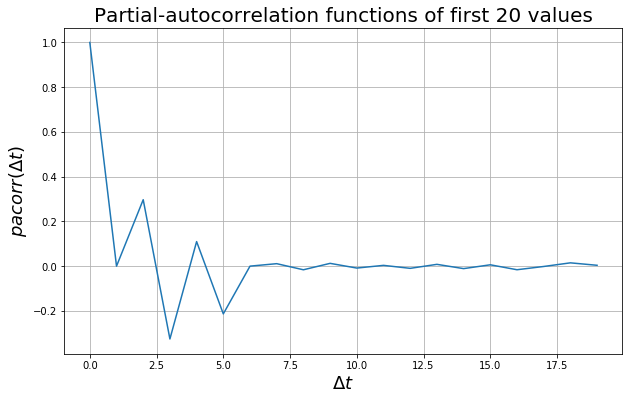

In [24]:
# Compute autocorrelation function
n = 20
corr_xAR = np.zeros(n)

for i in range(n):
    corr_xAR[i] = acorr(xAR, i)
    
# Plot
plt.figure(figsize=[10,6])
plt.plot(np.arange(n),corr_xAR)
plt.xlabel('$\Delta t$', fontsize = 18)
plt.ylabel(r'$\rho (\Delta t)$', fontsize = 18)
plt.grid()
plt.title('Autocorrelation functions of first %i values' %n, fontsize = 20)

# Compute partial-autocorrelation function
n = 20
acorr_xAR = pacorr(xAR, n)
    
# Plot
plt.figure(figsize=[10,6])
plt.plot(np.arange(n),acorr_xAR)
plt.xlabel('$\Delta t$', fontsize = 18)
plt.ylabel(r'$pacorr(\Delta t)$', fontsize = 18)
plt.grid()
plt.title('Partial-autocorrelation functions of first %i values' %n, fontsize = 20)

Text(0.5, 1.0, 'Partial-autocorrelation functions of first 20 values')

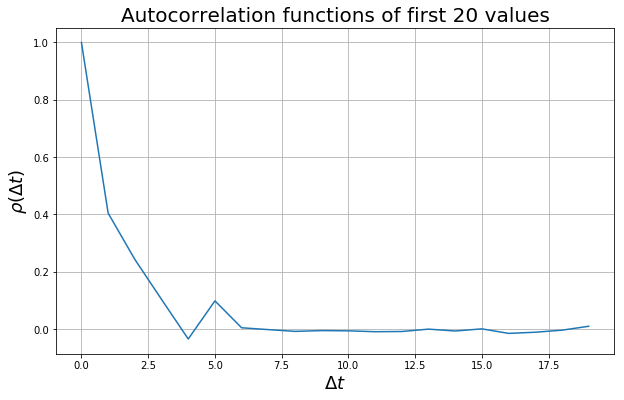

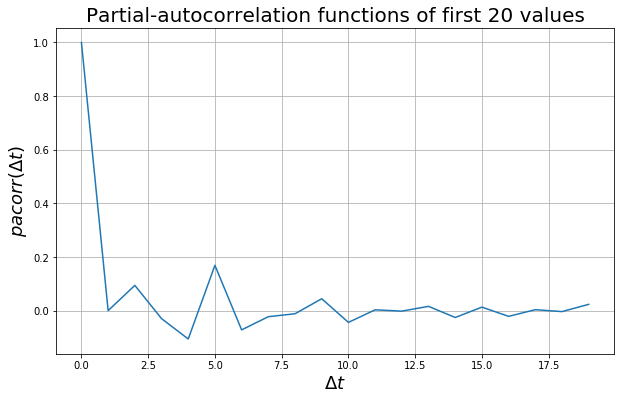

In [25]:
# Compute autocorrelation function
n = 20
corr_xMA = np.zeros(n)

for i in range(n):
    corr_xMA[i] = acorr(xMA, i)
    
# Plot
plt.figure(figsize=[10,6])
plt.plot(np.arange(n),corr_xMA)
plt.xlabel('$\Delta t$', fontsize = 18)
plt.ylabel(r'$\rho (\Delta t)$', fontsize = 18)
plt.grid()
plt.title('Autocorrelation functions of first %i values' %n, fontsize = 20)

# Compute partial-autocorrelation function
n = 20
acorr_xMA = pacorr(xMA, n)
    
# Plot
plt.figure(figsize=[10,6])
plt.plot(np.arange(n),acorr_xMA)
plt.xlabel('$\Delta t$', fontsize = 18)
plt.ylabel(r'$pacorr(\Delta t)$', fontsize = 18)
plt.grid()
plt.title('Partial-autocorrelation functions of first %i values' %n, fontsize = 20)

By looking at the plots, it can be noticed that the partial-autocorrelation for the AR process approaches to zero after the fifth timestep: this means that the order of the process is $p=5$. Instead, the autocorrelation of the MA process approaches to zero after the fifth timestep: so also the order of the MA process is $q=5$.